In [1]:
pip install gtts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install deepspeech

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 89.3 MB/s eta 0:00:00


In [3]:
!pip install pyaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 KB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
Failed to build pyaudio
ERROR: Could not build wheels for pyaudio, which is required to install pyproject.toml-based projects


In [4]:
pip install python_speech_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5886 sha256=30a51d3d530e436b8a1952bba3efe4c02b18675ef738438ef7df9f516d22183e
  Stored in directory: /root/.cache/pip/wheels/09/a1/04/08e2688d2562d8f9ff89e77c6ddfbf7268e07dae1a6f22455e
Successfully built python_speech_features


In [5]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import tensorflow as tf
import numpy as np
import scipy.io.wavfile as wav
import math
from IPython.display import Audio, display
import IPython.display as ipd
import matplotlib.pyplot as plt
import soundfile
import wave
from python_speech_features import mfcc
from pydub import AudioSegment
from pydub.playback import play
import random
from gtts import gTTS

In [7]:
!curl -LO https://github.com/mozilla/DeepSpeech/releases/download/v0.9.3/deepspeech-0.9.3-models.pbmm
!curl -LO https://github.com/mozilla/DeepSpeech/releases/download/v0.9.3/deepspeech-0.9.3-models.scorer

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  180M  100  180M    0     0   201M      0 --:--:-- --:--:-- --:--:--  170M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  909M  100  909M    0     0   107M      0  0:00:08  0:00:08 --:--:--  112M


In [8]:
import deepspeech
import numpy as np
import wave
model = deepspeech.Model('deepspeech-0.9.3-models.pbmm')
audio_file = '/content/drive/MyDrive/Colab Notebooks/Major Project/normal0.wav'
scorer_file_path = 'deepspeech-0.9.3-models.scorer'

# Load DeepSpeech model and scorer

model.enableExternalScorer(scorer_file_path)
# Define function to transcribe audio using the DeepSpeech model and scorer
def transcribe_audio(audio_file_path, model):
    # Read audio file
    with wave.open(audio_file_path, 'rb') as audio_file:
        audio = audio_file.readframes(audio_file.getnframes())
        audio = np.frombuffer(audio, dtype=np.int16)

    # Transcribe audio
    transcription = model.stt(audio)
    return transcription

# Transcribe audio file
# audio_file_path = 'path/to/audio/file.wav'
transcription = transcribe_audio(audio_file, model)

# Print transcription
print(transcription)

without the data the article useless


In [9]:
from scipy.io import wavfile
import numpy as np

# Load the audio file
sample_rate, audio = wavfile.read('/content/drive/MyDrive/Colab Notebooks/Major Project/normal0.wav')

# Preprocess the audio
# audio = (audio.astype(np.float32) / 32767.0).reshape(-1, 1)
# abc = tf.convert_to_tensor(audio, dtype=tf.float32)

In [10]:
import librosa
import librosa.display
from IPython.display import Audio, display

x = '/content/drive/MyDrive/Colab Notebooks/Major Project/normal0.wav'
  

# load audio files with librosa
scale, sr = librosa.load(x)

filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)
mel_spectrogram = librosa.feature.melspectrogram(y=scale, sr=sr, n_fft=2048, hop_length=512, n_mels=10)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

In [11]:
ipd.Audio(x)

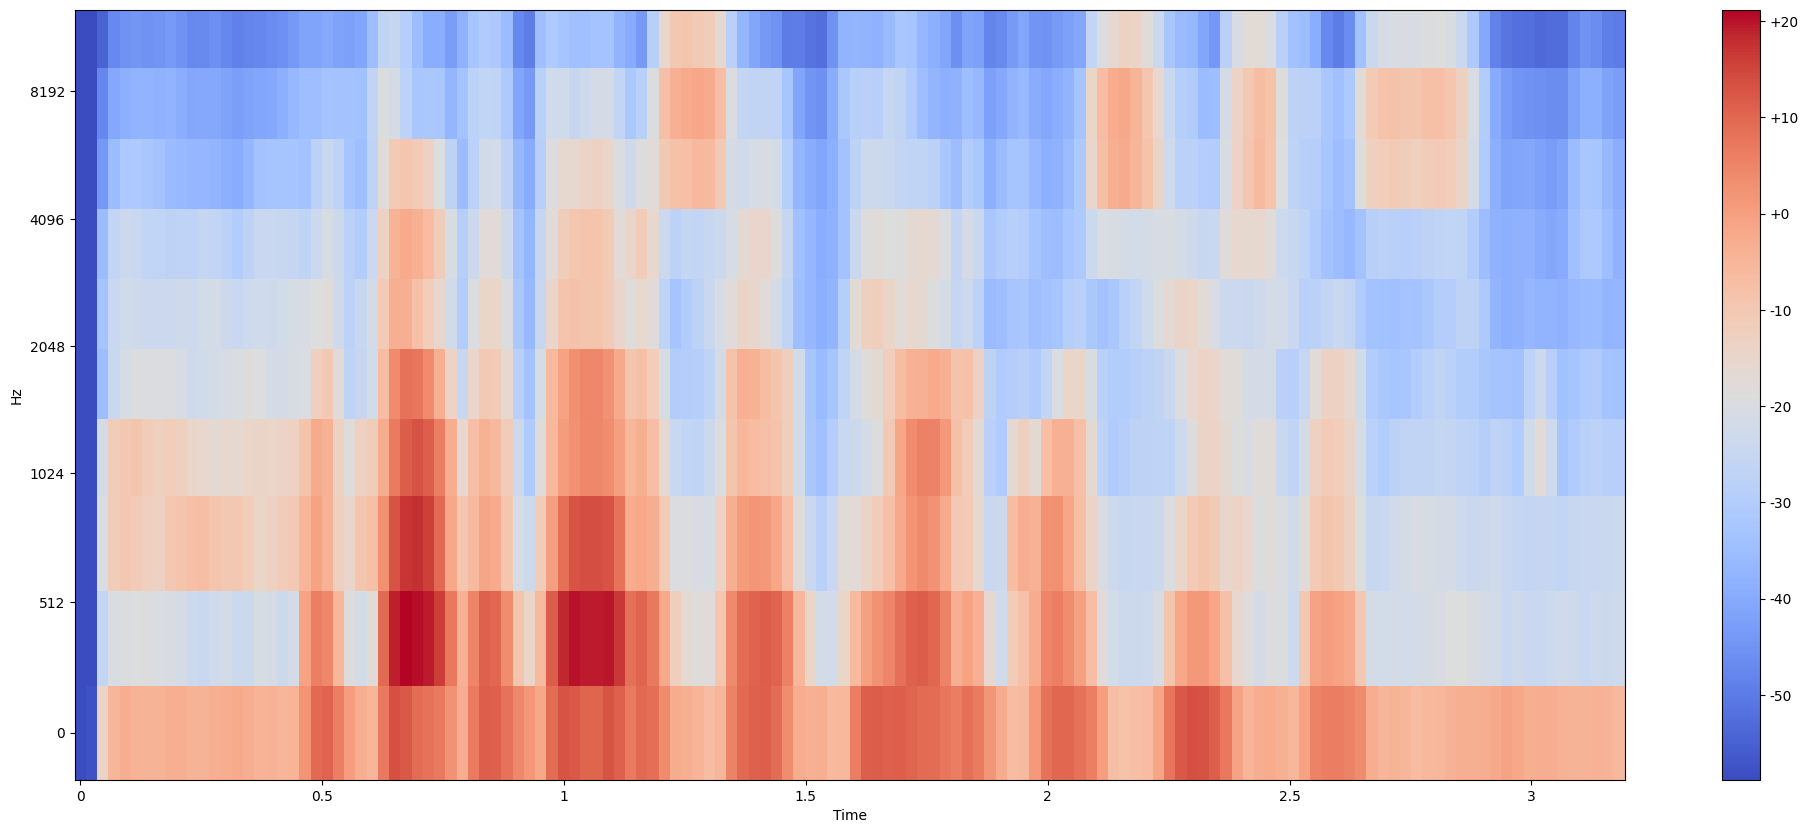

In [12]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

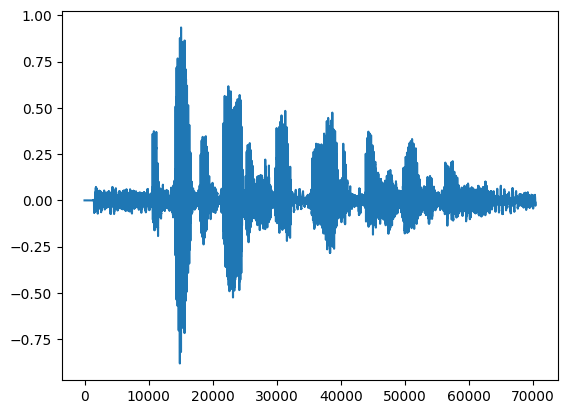

In [13]:
plt.plot(scale)

In [14]:
def get_white_noise(signal,SNR) :
    #RMS value of signal
    RMS_s=math.sqrt(np.mean(signal**2))
    #RMS values of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    #Additive white gausian noise. Thereore mean=0
    #Because sample length is large (typically > 40000)
    #we can use the population formula for standard daviation.
    #because mean=0 STD=RMS
    STD_n=RMS_n
    noise=np.random.normal(0, STD_n, signal.shape[0])
    return noise

scale=np.interp(scale, (scale.min(), scale.max()), (-1, 1))
noise=get_white_noise(scale,SNR=5)
noise_audio = Audio._make_wav(noise,sr,noise.any())

In [15]:
noise_audio = Audio._make_wav(noise,sr,noise.any())
ipd.Audio(noise_audio)

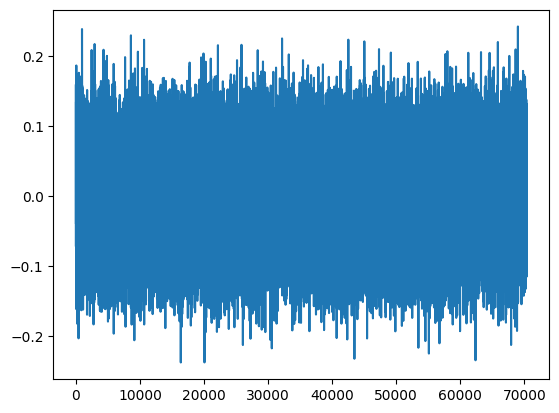

In [16]:
plt.plot(noise)

In [17]:
#***convert complex np array to polar arrays (2 apprays; abs and angle)
def to_polar(complex_ar):
    return np.abs(complex_ar),np.angle(complex_ar)

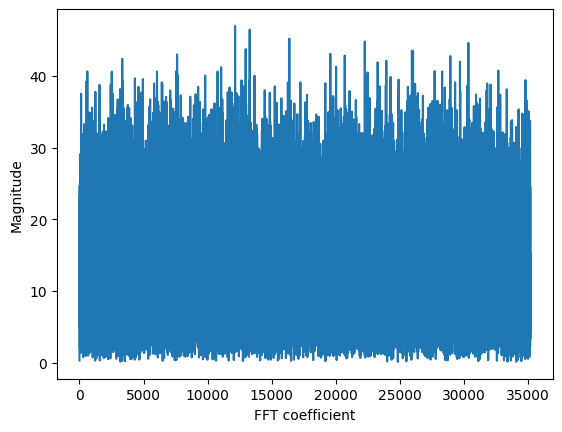

In [18]:
X=np.fft.rfft(noise)
radius,angle=to_polar(X)
plt.plot(radius)
plt.xlabel("FFT coefficient")
plt.ylabel("Magnitude")
plt.show()
signal_noise=scale+noise

In [19]:
import numpy as np

def mean_squared_error(x, y):
    return np.mean((x - y) ** 2)

In [20]:
sigaud = Audio._make_wav(signal_noise,sr,signal_noise.any())
soundfile.write('op.wav', signal_noise, sr) 
ipd.Audio(sigaud)

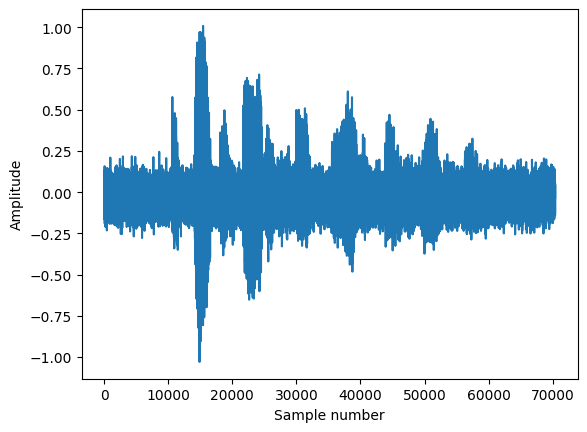

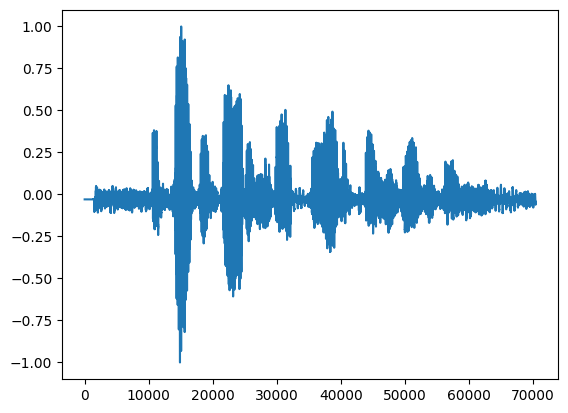

In [21]:
plt.plot(signal_noise)
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.show()

plt.plot(scale)

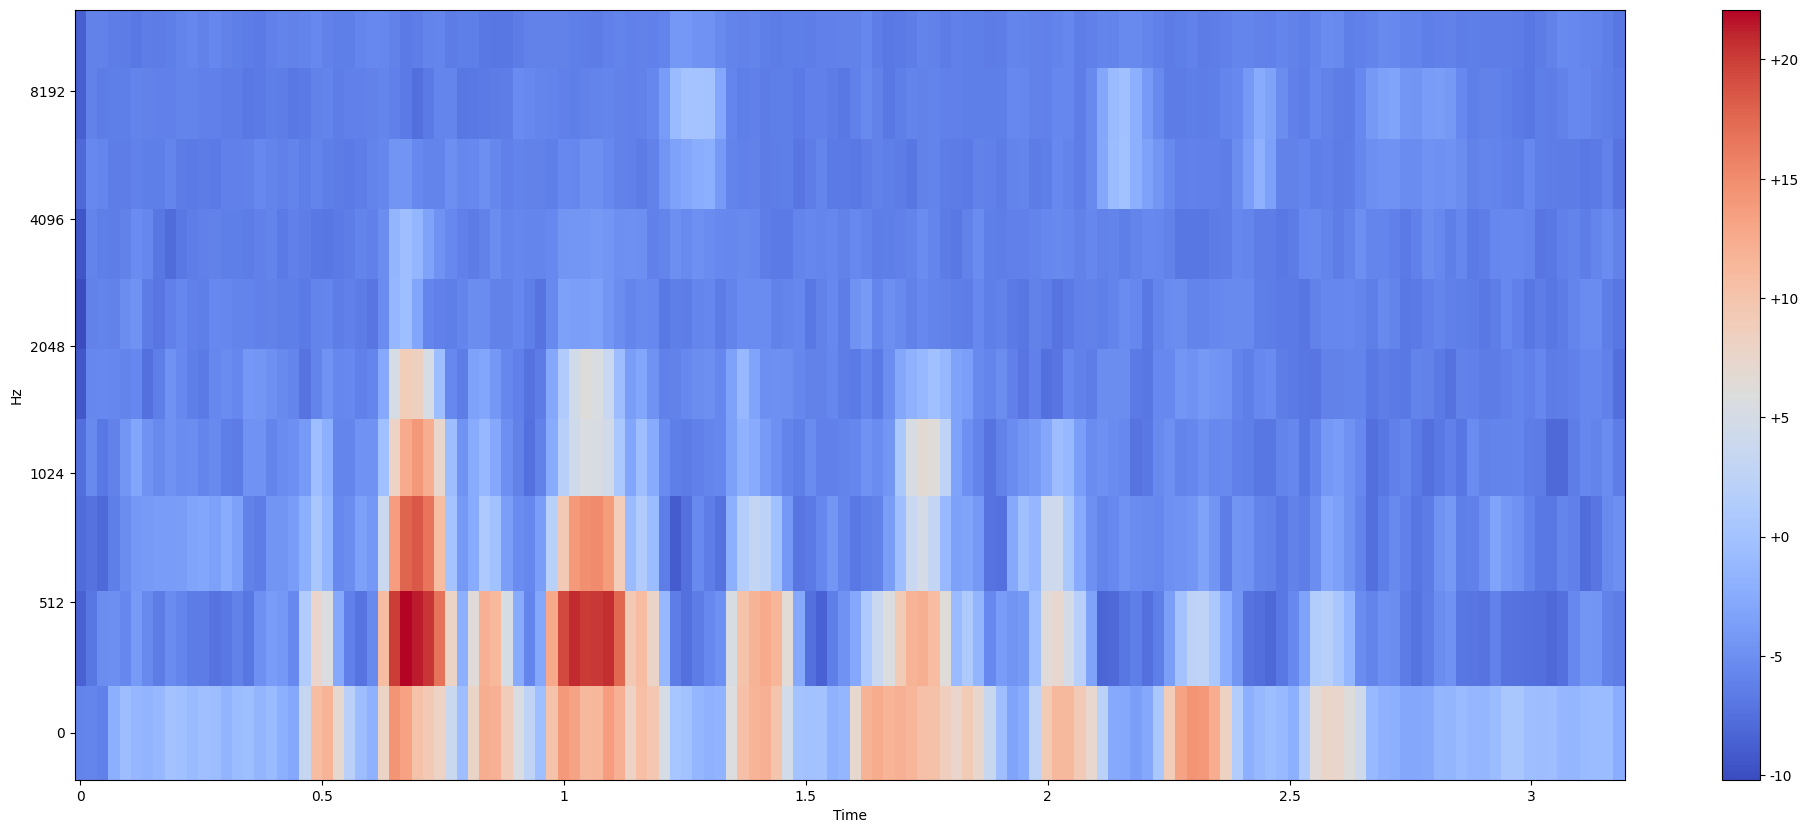

In [22]:
scale1, sr1 = librosa.load('op.wav')
mel_spectrogram1 = librosa.feature.melspectrogram(y=scale1, sr=sr1, n_fft=2048, hop_length=512, n_mels=10)
log_mel_spectrogram1 = librosa.power_to_db(mel_spectrogram1)
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram1, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr1)
plt.colorbar(format="%+2.f")
plt.show()

In [23]:
target_phrase = 'Hello, How can i help you?'

In [24]:
from gtts import gTTS
import os

# Specify the language of the text
language = 'en'

# Create a gTTS object
myobj = gTTS(text=target_phrase, lang=language, slow=False)

# Save the audio file in WAV format
myobj.save("target.wav")

In [25]:
target_audio = "target.wav"
ipd.Audio(target_audio)

In [26]:
import librosa

# Load audio file
audio_file = '/content/drive/MyDrive/Colab Notebooks/Major Project/normal0.wav'
audio, sr = librosa.load(audio_file)

# Generate MFCC features
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

# Display shape of MFCCs
print("MFCCs shape:", mfccs.shape)

MFCCs shape: (13, 138)


In [27]:
import librosa
import numpy as np
from scipy.fftpack import dct

# Load audio file
audio_file_path = '/content/drive/MyDrive/Colab Notebooks/Major Project/normal0.wav'
signal, sr = librosa.load(audio_file_path)

# Pre-emphasis filter
pre_emphasis = 0.97
emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

# Frame and window the signal
frame_size = 0.025
frame_stride = 0.010
frame_length, frame_step = frame_size * sr, frame_stride * sr
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))

pad_signal_length = num_frames * frame_step + frame_length
z = np.zeros((pad_signal_length - signal_length))
pad_signal = np.append(emphasized_signal, z)

indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(np.int32, copy=False)]

# Apply windowing function
hamming_window = np.hamming(frame_length)
frames *= hamming_window

# Calculate the power spectrum
NFFT = 512
mag_frames = np.absolute(np.fft.rfft(frames, NFFT)) 
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))

# Mel filter bank
nfilt = 40
low_freq_mel = 0
high_freq_mel = (2595 * np.log10(1 + (sr / 2) / 700))
mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)
hz_points = (700 * (10**(mel_points / 2595) - 1))
bin = np.floor((NFFT + 1) * hz_points / sr)

f_bank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])
    f_m = int(bin[m])
    f_m_plus = int(bin[m + 1])

    for k in range(f_m_minus, f_m):
        f_bank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        f_bank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])

# Apply Mel filter bank
filtered_frames = np.dot(pow_frames, f_bank.T)
filtered_frames = np.where(filtered_frames == 0, np.finfo(float).eps, filtered_frames)
filtered_frames = 20 * np.log10(filtered_frames)

# DCT
num_ceps = 12
mfcc = dct(filtered_frames, type=2, axis=1, norm='ortho')[:, 1:(num_ceps + 1)]

# Mean normalization
mfcc -= (np.mean(mfcc, axis=0) + 1e-8)

# Display MFCC features
print(mfcc)

[[-35.54177265  58.60558633 -57.05095317 ...  -1.03510001  12.64269294
   -2.28342543]
 [-35.54177265  58.60558633 -57.05095317 ...  -1.03510001  12.64269294
   -2.28342543]
 [-35.54177265  58.60558633 -57.05095317 ...  -1.03510001  12.64269294
   -2.28342543]
 ...
 [ 24.8018274  -24.12846932  51.1589569  ... -19.10136884  -5.8409521
   -9.71266377]
 [ 36.27966135 -24.81721199  48.78151376 ...  -6.92764551 -15.62068524
    4.04364406]
 [ 13.81481579  15.82572583  19.84617114 ...  -7.6041895   -7.54885643
    0.74110051]]


In [33]:
import wave
import numpy as np

# Open the audio file
audio_file = wave.open('/content/drive/MyDrive/Colab Notebooks/Major Project/normal0.wav', 'rb')

# Get the number of frames in the audio file
num_frames = audio_file.getnframes()
print(num_frames)

# Read all the frames into an array
audio_frames = audio_file.readframes(num_frames)
print(audio_frames)

# Convert the frames to a numpy array
audio_signal = np.frombuffer(audio_frames, dtype=np.int16)
print(audio_signal)

# Close the audio file
audio_file.close()

51072
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [36]:
import librosa
import numpy as np

# Load the audio signal
audio_file = '/content/drive/MyDrive/Colab Notebooks/Major Project/normal0.wav'
audio_signal, sample_rate = librosa.load(audio_file, sr=None, mono=True)

# Extract MFCC features
mfcc = librosa.feature.mfcc(y=audio_signal, sr=sample_rate, n_mfcc=13)
print(mfcc)

# Scale the MFCCs to have zero mean and unit variance
mfcc = (mfcc - np.mean(mfcc, axis=1, keepdims=True)) / np.std(mfcc, axis=1, keepdims=True)
print(mfcc)

# Print the shape of the MFCCs
print(mfcc.shape)

[[-5.9578094e+02 -4.1829758e+02 -2.9704877e+02 ... -3.4131467e+02
  -3.3991812e+02 -3.5174487e+02]
 [ 0.0000000e+00  1.1310332e+02  1.0954611e+02 ...  8.4083084e+01
   8.4904419e+01  9.9432266e+01]
 [ 0.0000000e+00 -5.9342313e-01 -1.9572235e+01 ...  2.4818733e+01
   2.2878220e+01  2.5064913e+01]
 ...
 [ 0.0000000e+00  2.8781590e+00  7.2148347e-01 ...  6.8701777e+00
   9.6351833e+00  8.7385540e+00]
 [ 0.0000000e+00  2.0149137e+01  2.8669247e+01 ...  4.3886809e+00
   9.1183186e+00  8.1245422e+00]
 [ 0.0000000e+00  1.2165273e+01  9.1712151e+00 ... -1.2649641e+01
  -1.3966360e+01 -8.7671375e+00]]
[[-4.07559872e+00 -2.08655572e+00 -7.27729201e-01 ... -1.22381389e+00
  -1.20816290e+00 -1.34070444e+00]
 [-1.87207043e+00  1.67063355e-01  1.02930695e-01 ... -3.56140912e-01
  -3.41333091e-01 -7.94113055e-02]
 [-4.14149046e-01 -4.29360896e-01 -9.15864110e-01 ...  2.22054854e-01
   1.72311693e-01  2.28365421e-01]
 ...
 [-2.09198564e-01  7.64685795e-02 -1.37588859e-01 ...  4.72690105e-01
   7.47126

In [46]:
import librosa
import numpy as np
from scipy.signal import resample

# Load the audio signal
audio_file = '/content/drive/MyDrive/Colab Notebooks/Major Project/normal0.wav'
audio_signal, sample_rate = librosa.load(audio_file, sr=None, mono=True)

# Extract MFCC features
mfcc = librosa.feature.mfcc(y=audio_signal, sr=sample_rate, n_mfcc=13)

# Scale the MFCCs to have zero mean and unit variance
mfcc = (mfcc - np.mean(mfcc, axis=1, keepdims=True)) / np.std(mfcc, axis=1, keepdims=True)

# Load the target audio
target_file = 'target.wav'
target_signal, target_sr = librosa.load(target_file, sr=None, mono=True)

# Resample the target audio to match the sample rate of the audio signal
target_signal = resample(target_signal, int(len(target_signal) * sample_rate / target_sr))

# Pad the target audio with zeros to match the length of the audio signal
if len(target_signal) < len(audio_signal):
    target_signal = np.pad(target_signal, (0, len(audio_signal) - len(target_signal)))
else:
    audio_signal = np.pad(audio_signal, (0, len(target_signal) - len(audio_signal)))

# Scale the target audio to have a maximum amplitude of 0.1
target_signal *= 0.1 / np.max(np.abs(target_signal))

# Compute the power spectrum of the audio signal
n_fft = 2048
hop_length = 512
power_spec = np.abs(librosa.stft(audio_signal, n_fft=n_fft, hop_length=hop_length))**2

# Compute the mel filterbank
mel_basis = librosa.filters.mel(sr=sample_rate, n_fft=n_fft, n_mels=128)

# Apply the mel filterbank to the power spectrum to get the mel spectrogram
mel_spec = np.dot(mel_basis, power_spec)

# Synthesize a signal from the mel spectrogram
synth_signal = librosa.feature.inverse.mel_to_audio(mel_spec, sr=sample_rate, n_fft=n_fft, hop_length=hop_length)

# Mix the target audio with the synthesized signal
mixed_signal = synth_signal + target_signal[:len(synth_signal)]

# Write the mixed signal to an audio file
soundfile.write('mixed.wav', mixed_signal, sample_rate)

In [47]:
ipd.Audio('mixed.wav')

In [48]:
import deepspeech
import numpy as np
import wave
model = deepspeech.Model('deepspeech-0.9.3-models.pbmm')
audio_file = 'mixed.wav'
scorer_file_path = 'deepspeech-0.9.3-models.scorer'

# Load DeepSpeech model and scorer

model.enableExternalScorer(scorer_file_path)
# Define function to transcribe audio using the DeepSpeech model and scorer
def transcribe_audio(audio_file_path, model):
    # Read audio file
    with wave.open(audio_file_path, 'rb') as audio_file:
        audio = audio_file.readframes(audio_file.getnframes())
        audio = np.frombuffer(audio, dtype=np.int16)

    # Transcribe audio
    transcription = model.stt(audio)
    return transcription

# Transcribe audio file
# audio_file_path = 'path/to/audio/file.wav'
transcription = transcribe_audio(audio_file, model)

# Print transcription
print(transcription)

lottie the articles
